In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('TASK-ML-INTERN.csv')

In [7]:
data.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [9]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
X = data.iloc[:, 1:-1]
y = data['vomitoxin_ppb']

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print('Variance explained:', pca.explained_variance_ratio_)

Variance explained: [0.87077909 0.05849069]


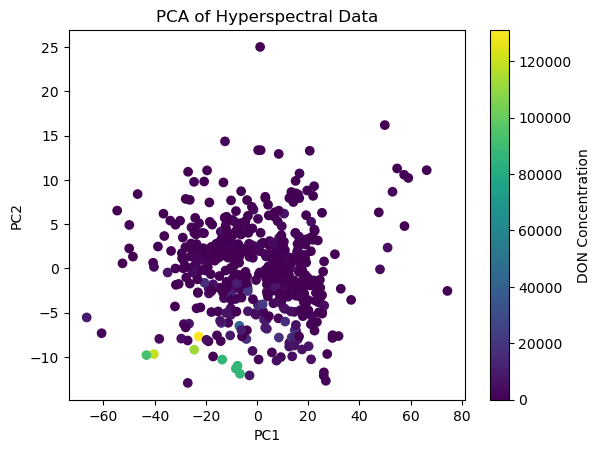

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Hyperspectral Data')
plt.colorbar(label='DON Concentration')
plt.show()

In [16]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1) # regression output layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


C:\Users\Abhiraj kumar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 52828416.0000 - mae: 2116.4675 - val_loss: 203122464.0000 - val_mae: 4078.4800
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 169000160.0000 - mae: 3289.5645 - val_loss: 202724736.0000 - val_mae: 4038.1606
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82457528.0000 - mae: 2326.2986 - val_loss: 201831792.0000 - val_mae: 3992.4429
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118140816.0000 - mae: 2497.6697 - val_loss: 199872704.0000 - val_mae: 3960.9583
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 270530560.0000 - mae: 3931.4783 - val_loss: 197547168.0000 - val_mae: 3967.1296
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 140445008.0000 - mae: 3096.2996 - val_loss: 194500832.0000 - val_mae: 3979.6223
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 128079000.0000 - mae: 3015.5500 - val_loss: 190892864.0000 - val_mae: 3941.0449
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [28]:
y_pred = model.predict(X_test)

mae =mean_absolute_error(y_test, y_pred).mean()

rmse = mean_squared_error(y_test,y_pred).mean()
r2_score =r2_score(y_test, y_pred).mean()

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R² Score: {r2_score}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
MAE: 3416.7812770462037
RMSE: 109932615.86233217
R² Score: 0.6067277515621837


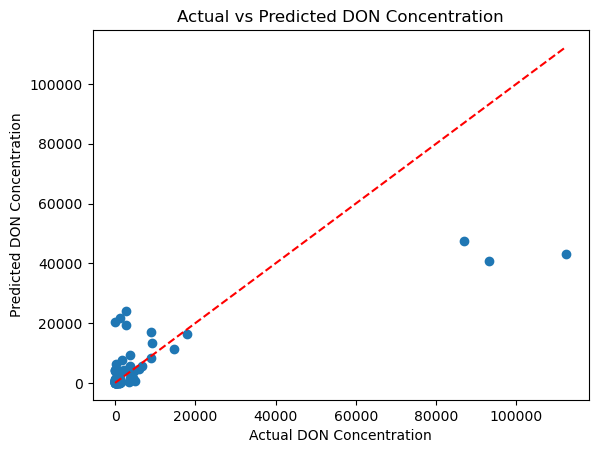

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual DON Concentration')
plt.ylabel('Predicted DON Concentration')
plt.title('Actual vs Predicted DON Concentration')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [31]:
y_test

361    1200.0
73     4400.0
374    3500.0
155    1500.0
104    3700.0
        ...  
347     600.0
86      400.0
75     1000.0
438     900.0
15      500.0
Name: vomitoxin_ppb, Length: 100, dtype: float64

In [32]:
y_pred

array([[4.2894006e+02],
       [1.5306606e+03],
       [2.3008247e+02],
       [3.5524258e+02],
       [5.5452964e+03],
       [5.4817664e+02],
       [1.0011436e+03],
       [3.8689136e+03],
       [4.3190830e+01],
       [7.2961279e+02],
       [3.2534496e+01],
       [5.7334680e+02],
       [3.6312225e+02],
       [3.6178214e+02],
       [1.2125398e+03],
       [4.5892358e+03],
       [3.2534496e+01],
       [3.2534496e+01],
       [1.4516988e+02],
       [4.7861015e+01],
       [6.8399695e+02],
       [1.1650232e+03],
       [7.3119739e+02],
       [2.0505328e+04],
       [2.4736542e+02],
       [4.3315332e+03],
       [4.5137271e+02],
       [3.0133151e+02],
       [5.9622333e+02],
       [3.3917770e+02],
       [8.2284143e+02],
       [8.3687268e+02],
       [4.3365689e+02],
       [6.4312866e+02],
       [1.1519043e+03],
       [2.4942940e+02],
       [3.3139290e+01],
       [6.2004712e+03],
       [1.5514374e+02],
       [4.8220139e+01],
       [4.2013084e+01],
       [4.046056